In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## **Import Dataset**

In [53]:
df = pd.read_csv('data/sales.csv')
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


## Explatory Data Analysis

In [54]:
df.shape

(2000, 11)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  2000 non-null   int64  
 1   sale_date        2000 non-null   object 
 2   sale_time        2000 non-null   object 
 3   customer_id      2000 non-null   int64  
 4   gender           2000 non-null   object 
 5   age              1990 non-null   float64
 6   category         2000 non-null   object 
 7   quantiy          1997 non-null   float64
 8   price_per_unit   1997 non-null   float64
 9   cogs             1997 non-null   float64
 10  total_sale       1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB


## Types of variables  

In this section, I separate the dataset into categorical and numerical variables.

In [56]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 4 categorical variables

The categorical variables are : ['sale_date', 'sale_time', 'gender', 'category']


In [57]:
df_categorical = df[categorical]
df_categorical.head()

,sale_date,sale_time,gender,category
0,2022-11-05,10:47:00,Male,Clothing
1,2022-07-09,11:00:00,Male,Beauty
2,2022-12-12,10:48:00,Female,Clothing
3,2022-01-06,08:53:00,Male,Clothing
4,2022-11-14,08:35:00,Male,Beauty


In [58]:
df_categorical.isnull().sum()

sale_date    0
sale_time    0
gender       0
category     0
dtype: int64

In [59]:
# Convert 'sale_date' to datetime format
df_categorical['sale_date'] = pd.to_datetime(df_categorical['sale_date'], format='%Y-%m-%d')

# Convert 'sale_time' to time format
df_categorical['sale_time'] = pd.to_datetime(df_categorical['sale_time'], format='%H:%M:%S').dt.time

# Check if the conversions were successful
print(df_categorical[['sale_date', 'sale_time']].head())


   sale_date sale_time
0 2022-11-05  10:47:00
1 2022-07-09  11:00:00
2 2022-12-12  10:48:00
3 2022-01-06  08:53:00
4 2022-11-14  08:35:00


C:\Users\user\AppData\Local\Temp\ipykernel_1372\3363168578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['sale_date'] = pd.to_datetime(df_categorical['sale_date'], format='%Y-%m-%d')
C:\Users\user\AppData\Local\Temp\ipykernel_1372\3363168578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['sale_time'] = pd.to_datetime(df_categorical['sale_time'], format='%H:%M:%S').dt.time


Earliest sale date: 2022-01-01 00:00:00
Latest sale date: 2023-12-31 00:00:00


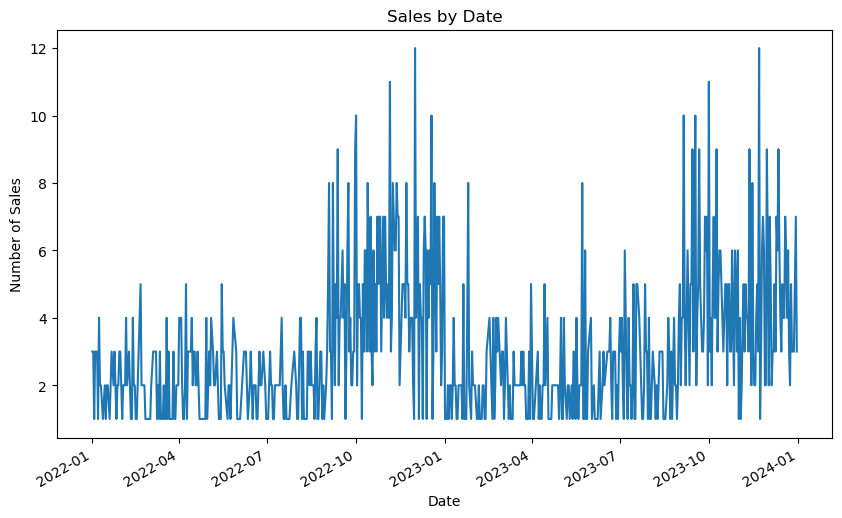

In [60]:
# Check for the range of dates
print(f"Earliest sale date: {df_categorical['sale_date'].min()}")
print(f"Latest sale date: {df_categorical['sale_date'].max()}")

# Optional: Plot sales over time to visually inspect outliers
import matplotlib.pyplot as plt

df_categorical['sale_date'].value_counts().sort_index().plot(kind='line', figsize=(10,6))
plt.title('Sales by Date')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.show()


**Seasonal or Periodic Trends:**  

    There is a noticeable increase in the number of sales between September 2022 and February 2023, peaking around the end of 2022 and early 2023. This could indicate seasonal demand or holiday-related shopping trends, such as Black Friday, Christmas, and New Year sales.  

    After February 2023, the sales drop significantly before slowly picking up again towards October 2023, which may indicate a cyclical or seasonal pattern, perhaps due to promotions or events in certain months.   

**Periods of Low Sales:**

    There are distinct periods where sales activity is very low, particularly between April 2023 and July 2023. This could be due to off-peak seasons, economic factors, or lack of promotions during this time.   

**Sales Spikes:**   

    The sharp spikes, especially in January 2023 and October 2023, suggest brief periods of higher-than-normal activity. These spikes could be caused by flash sales, limited-time offers, or specific events like holidays or back-to-school periods.   

**Recent Activity:**  

    Sales seem to pick up again in October 2023 and continue with some volatility towards the end of the year. It indicates that sales in this period might be rising again as businesses prepare for the holiday season.


**Potential Actions Based on the Visualization:**  

**1. Plan Promotions Around Peak Periods:**  

    If certain months like December/January or October/November consistently show higher sales, you can focus marketing campaigns and promotions around these times to maximize profit.  

**2. Investigate Low-Activity Months:**  

    The period from April to July 2023 shows reduced sales. It may be worth investigating why this is happening. Are there fewer promotions? Is this an off-season for certain products?  

**3. Leverage Holiday Season:**  

    The sales surge around the holiday period (late 2022, early 2023) indicates that customers may respond positively to promotions during this time. Adjust pricing, stock, and marketing to capitalize on holiday shopping trends.  

### Group the Sales by months

C:\Users\user\AppData\Local\Temp\ipykernel_1372\3989140568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['sale_date'] = pd.to_datetime(df_categorical['sale_date'])
C:\Users\user\AppData\Local\Temp\ipykernel_1372\3989140568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['month_year'] = df_categorical['sale_date'].dt.to_period('M')


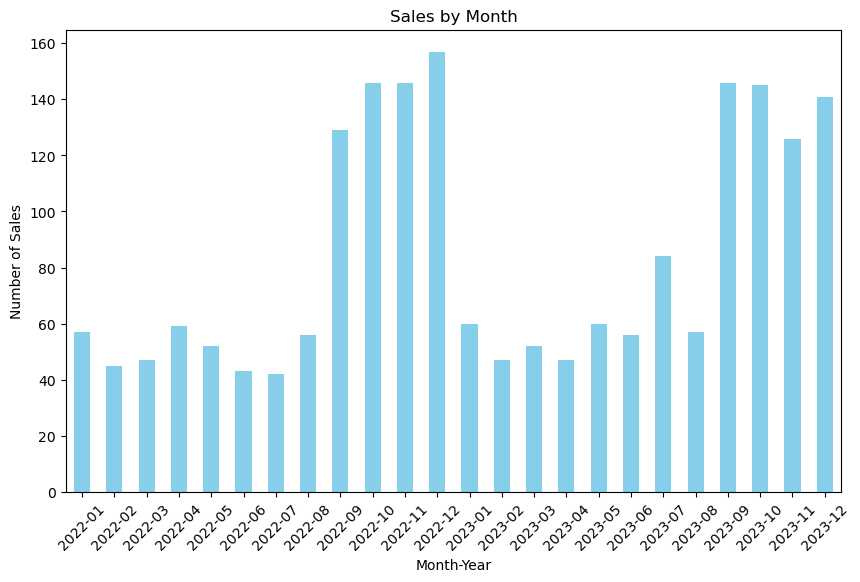

In [61]:
# Convert 'sale_date' to datetime if not already done
df_categorical['sale_date'] = pd.to_datetime(df_categorical['sale_date'])

# Extract the month and year for easier grouping
df_categorical['month_year'] = df_categorical['sale_date'].dt.to_period('M')

# Group by month and count the number of sales per month
monthly_sales = df.groupby(df_categorical['month_year'])['transactions_id'].count()

# Plotting monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()


**Peak Sales Periods:**  

    1. August 2022 to January 2023: This period shows a notable rise in sales, with October and December 2022 having the highest sales volumes. This could be due to:  

    * Holiday seasons (like Christmas in December).  
    * Seasonal promotions or events.*  

    2. August to November 2023: Another noticeable peak in sales occurs in these months, which may follow a similar trend as the previous year (perhaps annual promotions or a recurring shopping event).  

**Low Sales Periods:**  

    The lowest sales volumes occur between February 2023 and May 2023. This might indicate an off-peak season where fewer promotions or events take place. Further analysis of external factors, like economic conditions or seasonal trends, could provide more insights.
**Observations:**  

    Recurring Peaks: August to December seems to consistently have high sales, suggesting these months are crucial for business.
    Off-Peak Months: Between February and May, the business appears to slow down, perhaps requiring targeted promotions or campaigns to improve sales during these months.
**Further Analysis:**

    We could analyze specific product categories and customer segments during these high and low periods to see what drives the peaks and dips.
    It would also be useful to look at the average transaction value to see if these high-sales months also correspond to higher revenue per sale.

In [62]:
df_categorical.head()

,sale_date,sale_time,gender,category,month_year
0,2022-11-05,10:47:00,Male,Clothing,2022-11
1,2022-07-09,11:00:00,Male,Beauty,2022-07
2,2022-12-12,10:48:00,Female,Clothing,2022-12
3,2022-01-06,08:53:00,Male,Clothing,2022-01
4,2022-11-14,08:35:00,Male,Beauty,2022-11


In [63]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   sale_date   2000 non-null   datetime64[ns]
 1   sale_time   2000 non-null   object        
 2   gender      2000 non-null   object        
 3   category    2000 non-null   object        
 4   month_year  2000 non-null   period[M]     
dtypes: datetime64[ns](1), object(3), period[M](1)
memory usage: 78.3+ KB


In [64]:
df_categorical['sale_time'] = pd.to_datetime(df_categorical['sale_time'], format='%H:%M:%S').dt.time

C:\Users\user\AppData\Local\Temp\ipykernel_1372\1259779265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['sale_time'] = pd.to_datetime(df_categorical['sale_time'], format='%H:%M:%S').dt.time


In [65]:
# Display the first few rows to verify
print(df_categorical[['sale_time']].head())

  sale_time
0  10:47:00
1  11:00:00
2  10:48:00
3  08:53:00
4  08:35:00


In [66]:
# Extract the hour and create a new 'hour' column
df_categorical['hour'] = pd.to_datetime(df_categorical['sale_time'], format='%H:%M:%S').dt.hour

# Display the first few rows to verify the new 'hour' column
print(df_categorical[['sale_time', 'hour']].head())


  sale_time  hour
0  10:47:00    10
1  11:00:00    11
2  10:48:00    10
3  08:53:00     8
4  08:35:00     8


C:\Users\user\AppData\Local\Temp\ipykernel_1372\2646779960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['hour'] = pd.to_datetime(df_categorical['sale_time'], format='%H:%M:%S').dt.hour


In [67]:
df_categorical.drop('sale_time',axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1372\2861593573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical.drop('sale_time',axis=1, inplace=True)


In [68]:
df_categorical['gender'].value_counts()

gender
Female    1020
Male       980
Name: count, dtype: int64

In [69]:
df_categorical['category'].value_counts()

category
Clothing       702
Electronics    684
Beauty         614
Name: count, dtype: int64

### One-Hot-Encoding

In [70]:
pd.get_dummies(df_categorical['category'], drop_first=False, dtype='int').head()



,Beauty,Clothing,Electronics
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [71]:
pd.get_dummies(df_categorical['gender'], drop_first=False, dtype='int').head()



,Female,Male
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [72]:
df_categorical.head()

,sale_date,gender,category,month_year,hour
0,2022-11-05,Male,Clothing,2022-11,10
1,2022-07-09,Male,Beauty,2022-07,11
2,2022-12-12,Female,Clothing,2022-12,10
3,2022-01-06,Male,Clothing,2022-01,8
4,2022-11-14,Male,Beauty,2022-11,8


In [73]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   sale_date   2000 non-null   datetime64[ns]
 1   gender      2000 non-null   object        
 2   category    2000 non-null   object        
 3   month_year  2000 non-null   period[M]     
 4   hour        2000 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(2), period[M](1)
memory usage: 70.4+ KB


In [ ]:
df_categorical